# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [1]:
import os, glob
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.

# Allows developper to press tab for autocompletion
%config IPComplete.greedy=True;
fig_size = (15,5)

In [2]:
DATA_FOLDER = 'data'

___
## Task A. Another LEGO brick in the wall

>LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

>This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

>![lego-schema](lego-schema.png)

>In this task you have to apply the following Data Wrangling pipeline:
>1. Load your data into `Pandas`
>* Explore it and clean its dirty parts
>* Use it to answer a set of queries

### A1. Loading phase
>_Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

In [3]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

__Step 1:__ Getting a list of all the csv files in the directory

In [4]:
startingDir = os.getcwd()
os.chdir(LEGO_DATA_FOLDER)
allFiles = glob.glob( '*.csv.zip' ) # glob finds all the pathnames matching a specified pattern
print("allFiles = ",allFiles)

allFiles =  ['colors.csv.zip', 'inventories.csv.zip', 'inventory_parts.csv.zip', 'inventory_sets.csv.zip', 'parts.csv.zip', 'part_categories.csv.zip', 'sets.csv.zip', 'themes.csv.zip']


__Step 2:__ Creating a dictionary ``'data'`` with imported dataframes and file names as keys 

In [5]:
allFilesNames = list(map(lambda f: f.replace(".csv.zip", ""), allFiles))
data = dict(zip(allFilesNames, list(map(lambda f: pd.read_csv(f), allFiles))))

for file, dataframe in data.items(): 
    print(file.upper(), ": \n", dataframe.head(3), "\n")

os.chdir(startingDir)

INVENTORY_SETS : 
    inventory_id   set_id  quantity
0            35  75911-1         1
1            35  75912-1         1
2            39  75048-1         1 

SETS : 
        id                        name  year  theme_id  num_parts
0    00-1             Weetabix Castle   70s       414        471
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          2 

PARTS : 
        id                                               name  part_cat_id
0  0687b1                        Set 0687 Activity Booklet 1           17
1    0901  Baseplate 16 x 30 with Set 080 Yellow House Print            1
2    0902  Baseplate 16 x 24 with Set 080 Small White Hou...            1 

INVENTORY_PARTS : 
    inventory_id   part_id  color_id  quantity is_spare
0             1  48379c01        72       1.0        f
1             1     48395         7       1.0        f
2             1  mcsport6        25       1.0        f 

INVENTORIES : 
   

In [6]:
# Copying the original dataframes into variables to separate the processing and better understanding
inventory_sets = data['inventory_sets'].copy()
inventory_parts = data['inventory_parts'].copy()
part_categories = data['part_categories'].copy()
sets = data['sets'].copy()
colors = data['colors'].copy()
themes = data['themes'].copy()
inventories = data['inventories'].copy()
parts = data['parts'].copy()

### A2. Cleaning phase
>Explore the following columns from your dataset:
>1. sets: year
>* inventory_parts: quantity

>What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

__step 1: cleaning ``sets: year``__

> year = Year the set was published

Let's start by analyzing the data we have.

Do do that, we check if each entry is valid using a function that tries to wright it in the datetime format.

In [7]:
# Validate function to check if a year is in the correct datetime format
# return: True if the year is valid, False otherwise
def validate_year(year_text):
    try:
        datetime.datetime.strptime(year_text, '%Y')
        return True
    except: 
        return False

In [8]:
n_total = len(sets['year'])
print("Total number of entries:   ", n_total) 

n_not_valid = np.count_nonzero(sets['year'].apply(lambda x : validate_year(x)) == False)
print("Number of entries with an invalid year:   ", n_not_valid) 

Total number of entries:    11673
Number of entries with an invalid year:    3085


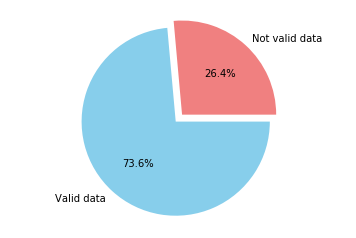

In [9]:
labels = 'Not valid data', 'Valid data'; colors_graph = ['lightcoral', 'skyblue']
plt.pie([n_not_valid, n_total-n_not_valid], autopct='%1.1f%%', explode=(0.1, 0), labels=labels, colors=colors_graph)
plt.axis('equal'); plt.show()

A first look at the entries in ``sets['year']`` shows us that __we have a lot of incorrect year formats: 26.4%.__ We understand from this result that we will need to correct as much as we can to avoid losing too many informations.

Let's take a look a the different entries we have in our data:

In [10]:
print("Number of unique entries:   ",len(sets['year'].unique()))
print("\n",sets['year'].unique().tolist())

Number of unique entries:    174

 ['70s', '1978', '1987', '1979', '19788', '1976', '1965', '1985', '1968', '1999', '1967', '1969', '2001', '20011', '1966', '2003', '2002', '20022', '-2003', '20033', '-2002', '20044', '2004', '2006', '20055', '2005', '-2004', '-2006', '-2010', '-2005', '20066', '2007', '20077', '2008', '20088', '-2009', '2009', '20099', '2010', '20100', '-2011', '2011', '20111', '2012', '20122', '-2013', '2013', '20133', '20144', '-20144', '2015', '2014', '-2014', '20155', '-2015', '2016', '20166', '-2016', '2017', '1977', '1983', '1986', '1984', '1973', '-2012', '-20155', '1981', '-2000', '80s', '1982', '1988', '20177', '-2017', '-1999', '19999', '-1986', '1997', '1998', '1971', '-1966', '-1977', '-1981', '-1985', '20000', '2000', '-20000', '1955', '1956', '1957', '-1982', '-1969', '19822', '19555', '1958', '-2001', '1974', '1972', '19988', '-1998', '19877', '19855', '19777', '1975', '-1987', '-1979', '1992', '1991', '-1991', '1989', '1990', '1993', '-1992', '-1989', 

Let's also take a look at the repartition of the correct data. That way, we will be able to check if a corrected year seems to fit our existing data or if we introduced outliers due to incorrect correction:

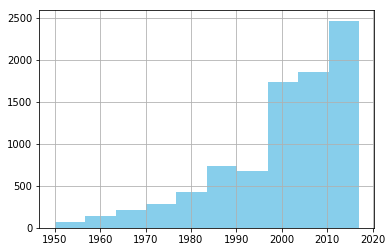

In [11]:
sets[sets['year'].apply(lambda x : validate_year(x))]['year'].apply(lambda x : float(x)).hist(color = "skyblue")

A first quick look in the list of years we have in our data shows that quite __a lot of them are negative numbers__, and thus incorect year formats. (Legos are old, but not that much!)

We make the following hypothesis: __These data most probably correspond to typos, and a negative sign came up in front of the real value.__

We believe our assumption to be justified, but there is always a chance that we may be mistaken and that our analysis may be incorrect. So before making a change, let's check how many values are affected by this same error:

In [12]:
n_negative = len(sets.loc[sets['year'].str.contains("-")])             
print("Number of entries with a negative year:   ", n_negative) 

Number of entries with a negative year:    1261


In [13]:
# replacing "negative"values by deleting all "-""
sets['year'] = sets['year'].apply(lambda x: x.replace("-", ""))

Now let's check our corrected data:

Number of unique entries:    113

Number of entries with an invalid year:    1906


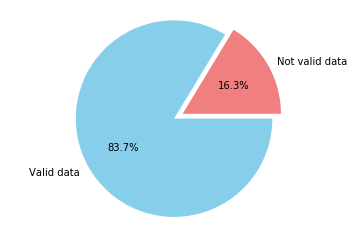

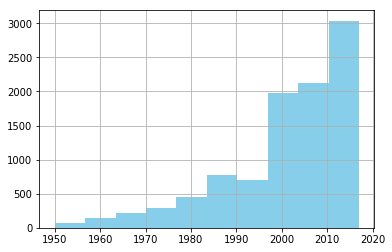

In [14]:
print("Number of unique entries:   ",len(sets['year'].unique()))
n_not_valid = np.count_nonzero(sets['year'].apply(lambda x : validate_year(x)) == False)
print("\nNumber of entries with an invalid year:   ", n_not_valid)
plt.pie([n_not_valid, n_total-n_not_valid], autopct='%1.1f%%', explode=(0.1, 0), labels=labels, colors=colors_graph)
plt.axis('equal'); plt.show()

sets[sets['year'].apply(lambda x : validate_year(x))]['year'].apply(lambda x : float(x)).hist(color = "skyblue")

Only by replacing negative values by positive ones, we fixed 1179 incorrect years to a valid one! Indeed, the histogram shows that we've not added any outlier to our data.

Let's now ckeck all remaining incorrect years we hhave in our data:

In [15]:
print(sets['year'][sets['year'].apply(lambda x : validate_year(x)) == False].unique())

['70s' '19788' '20011' '20022' '20033' '20044' '20055' '20066' '20077'
 '20088' '20099' '20100' '20111' '20122' '20133' '20144' '20155' '20166'
 '80s' '20177' '19999' '20000' '19822' '19555' '19988' '19877' '19855'
 '19777' '19944' '19899' '19900' '19922' '19966' '19722' '19955' '19933'
 '19977' '19666' '19799' '19911' '19622' '19844' '19866' '19888' '19811'
 '19800' '19833' '19699']


Once again, we can see at a glance that a pattern seems to emerge in the remaining incorrect years: __Many years have 5 digits, and the last digit is always double!__

So let's make a new hypothesis: __Once again, these dates correspond to typos, and the last digit has been typed a second time after the correct value for the year.__*

In [16]:
#deleting last number if years consist of 5 digits
sets['year'] = sets['year'].apply(lambda x: x[:-1] if len(x)>4 else x)

And now we can check our results once again

Number of unique entries:    67

Number of entries with an invalid year:    114


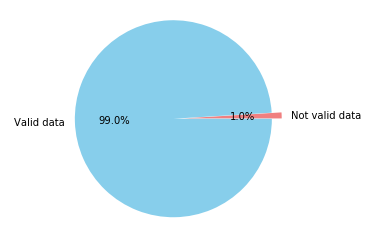

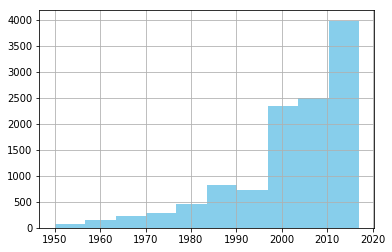

In [17]:
print("Number of unique entries:   ",len(sets['year'].unique()))
n_not_valid = np.count_nonzero(sets['year'].apply(lambda x : validate_year(x)) == False)
print("\nNumber of entries with an invalid year:   ", n_not_valid)
plt.pie([n_not_valid, n_total-n_not_valid], autopct='%1.1f%%', explode=(0.1, 0), labels=labels, colors=colors_graph)
plt.axis('equal'); plt.show()
sets[sets['year'].apply(lambda x : validate_year(x))]['year'].apply(lambda x : float(x)).hist(color = "skyblue")

This second correction we applied was very effective! We managed to correct 1792 years without adding any outlier. Only 114 invalid years remain.

Let's ckeck again all remaining incorrect years we hhave in our data:

In [18]:
print(sets['year'][sets['year'].apply(lambda x : validate_year(x)) == False].unique())

['70s' '80s']


This time, __we only have 2 incorrect unique entries, but it doesn't seem we could apply any correction to them.__ Indeed, this errors come from users who entered an approximate year instead of a precise value, as 70s for example coult potentially be any year between 1970 and 1979.

This erros represent only 1.0% of our data, so __we consider that deleting this data is highly acceptable and will only make us loose very little of the information.__

In [19]:
# dropping all remaining rows with pandas.DataFrame.drop
sets.drop( sets[ sets.year.apply(lambda y : not validate_year(y)) ].index, inplace=True)
print(sets['year'].unique())

['1978' '1987' '1979' '1976' '1965' '1985' '1968' '1999' '1967' '1969'
 '2001' '1966' '2003' '2002' '2004' '2006' '2005' '2010' '2007' '2008'
 '2009' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '1977' '1983'
 '1986' '1984' '1973' '1981' '2000' '1982' '1988' '1997' '1998' '1971'
 '1955' '1956' '1957' '1958' '1974' '1972' '1975' '1992' '1991' '1989'
 '1990' '1993' '1994' '1996' '1995' '1959' '1962' '1961' '1960' '1963'
 '1964' '1980' '1950' '1953' '1954']


Finally, let's check out data one last time to see if we still ave any incorrect year remaining:


Number of entries with an invalid year:    0


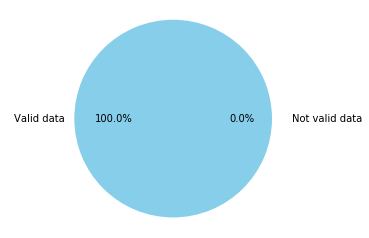

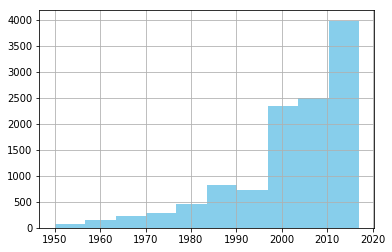

In [20]:
n_not_valid = np.count_nonzero(sets['year'].apply(lambda x : validate_year(x)) == False)
print("\nNumber of entries with an invalid year:   ", n_not_valid)
plt.pie([n_not_valid, n_total-n_not_valid], autopct='%1.1f%%', explode=(0.1, 0), labels=labels, colors=colors_graph)
plt.axis('equal'); plt.show()
sets[sets['year'].apply(lambda x : validate_year(x))]['year'].apply(lambda x : float(x)).hist(color = "skyblue")

We don't have any more incorrect data, meaning that __all of our entries in 'year' can be converted to datatime format!__

__step 2: cleaning ``inventory_parts: quantity``__

Let's start by analyzing the data we have.

This time, we are analyzing a quantity of parts included in a Lego set. We can assume that this number can be very large, but needs to be at least superior or equal to 1. Indeed, if a part belongs to a set, it wouldn't make sense for its quantity to be 0. Moreover, a quantity is by definition a positive number.

In [21]:
n_total = len(inventory_parts['quantity'])
print("Total number of entries:   ", n_total) 

n_not_valid = np.count_nonzero(inventory_parts['quantity'].apply(lambda x : x<1) == True)
print("Number of entries with an invalid year:   ", n_not_valid) 

Total number of entries:    580251
Number of entries with an invalid year:    161796


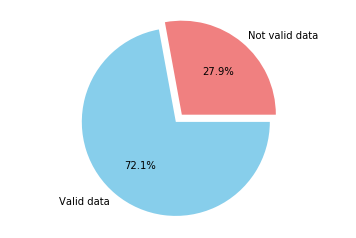

In [22]:
plt.pie([n_not_valid, n_total-n_not_valid], autopct='%1.1f%%', explode=(0.1, 0), labels=labels, colors=colors_graph)
plt.axis('equal'); plt.show()

We have a lot of invalid data!

First let's see the repartition of the correct data:

count    418455.000000
mean          3.836938
std           9.642451
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max        1440.000000
Name: quantity, dtype: float64


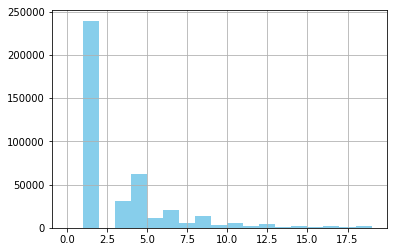

In [23]:
correct_quantities = inventory_parts[inventory_parts['quantity'].apply(lambda x : x>0)]['quantity'].apply(lambda x : float(x))
print(correct_quantities.describe())
correct_quantities.hist(color="skyblue",bins=np.arange(20)); plt.show()

Now let's take a look at the incorrect entries:

In [24]:
inventory_parts[inventory_parts['quantity'].apply(lambda x : x<1) == True]['quantity'].unique()

array([-inf])

So it seems like __we only have one type of errors this time.__ Some quantities are set to "-inf".

As we said earlier, we must have `quantity > 0` for it to be correct.

Considering the important numbers of unset quantities, and using the Lego informations given by the repartition of the correct data telling us that there are a lot more unique pieces in a set, we make the following hypothesis: __Every piece which has a quantity of -inf is a unique piece and we will set it to 1.__

In [25]:
# Replacing -inf with 1
inventory_parts.loc[inventory_parts['quantity'] < 0, 'quantity'] = 1

Let's check the results, and verify that there is no remaining errors in the quantities.

count    580251.000000
mean          3.045892
std           8.286721
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max        1440.000000
Name: quantity, dtype: float64

Number of entries with an invalid year:    0


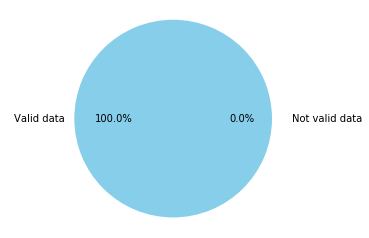

In [26]:
print(inventory_parts['quantity'].describe())
n_not_valid = np.count_nonzero(inventory_parts['quantity'].apply(lambda x : x<1) == True)
print("\nNumber of entries with an invalid year:   ", n_not_valid) 
plt.pie([n_not_valid, n_total-n_not_valid], autopct='%1.1f%%', explode=(0.1, 0), labels=labels, colors=colors_graph)
plt.axis('equal'); plt.show()

All of the quantities are correct! The dataset in now cleaned.

### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

___

__Question A3.1 : List the ids of the inventories that belong to sets that contain cars.__

We can see that themes contains the names of all different lego themes. So after looking at some values, we highlight 
that some themes can be link to cars, such as 'Race' and 'Traffic'.

 - So first step, query theme ids that matches with a list = ['Race', 'Traffic']
 - Then sets dataFrame contains ids and theme_ids. So we query ids in sets that match with theme_id
 - Finally we get inventory id that match with previous sets ids.

In [27]:
# Word of car theme found in theme
car_theme = ['Race', 'Traffic']

# Query ids in theme link to car
car_theme_id = themes['id'].loc[themes['name'].isin(car_theme)].values

# Query ids in sets of id theme link to car
sets_car_ids = sets['id'].loc[sets['theme_id'].isin(car_theme_id)].values

inventoriy_contains_car_id = inventory_sets['inventory_id'].loc[inventory_sets['set_id'].isin(sets_car_ids)].values;
print(set(inventoriy_contains_car_id))

{16131, 8202, 528, 5904, 10515, 2836, 14493, 2849, 15010, 4643, 3755, 6066, 1716, 10043, 962, 1347, 13380, 14919, 9426, 7766, 15192, 14174, 1765, 8425, 3053, 7151, 3313, 10993, 10227, 8950, 14711, 8440, 9210, 14717}


__Question A3.2 : Plot the distribution of part categories as a (horizontal) bar chart.__

First we count all parts_cat_id in parts is a new list. 

Then we merge this list (which counts part_cat_id in parts) with part_categories to get the name, count and id of each part_cat_id.
Then we sort the table descending and keep the 20 first that we display in a bar plot.

,name,count
id,,
13,Minifigs,8556
27,Minifig Accessories,2071
17,Non-LEGO,1964
4,"Duplo, Quatro and Primo",1552
10,Tiles Printed,1191
24,Other,1125
41,"Bionicle, Hero Factory and Constraction",1116
2,Bricks Printed,744
28,Plants and Animals,742


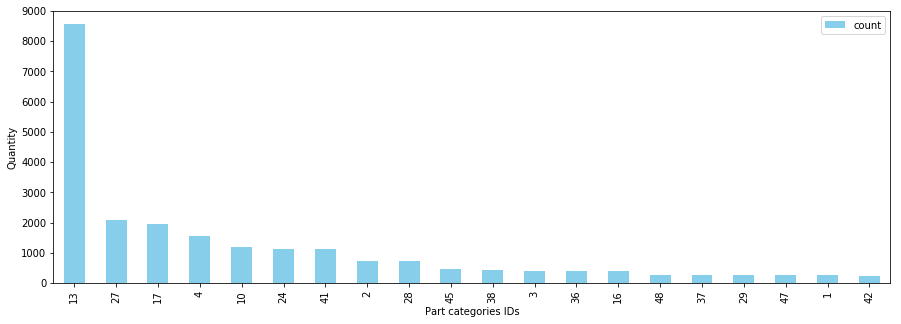

In [28]:
# Couunt all part_cat_id in parts
distribution = parts.groupby(['part_cat_id']).count();

part_cat_id = part_categories.set_index('id');

# Merge part_cat_id with their respective names based on ids
distribution_part = pd.merge(part_cat_id, distribution, left_index=True, right_index=True);
distribution_part = distribution_part.drop(columns='name_y');

# Change column names
distribution_part = distribution_part.rename(columns={'name_x': 'name', 'id': 'count'})

# Sort descending values of count
distribution_part = distribution_part.sort_values('count',ascending=False);
# Keep the 20 first values
distribution_part = distribution_part.head(20)

bar_plot = distribution_part.plot.bar(rot=90, color=colors_graph[1],figsize=fig_size)
bar_plot.set_ylabel("Quantity");
bar_plot.set_xlabel("Part categories IDs");

distribution_part

__Question A3.3 : Find the dominant color of each set__

To find the dominant color of a set, we must:
- select each set
- find every inventories belonging to it
- get every parts in those inventories and their quantities
- finally we can compute which part color is the most dominant in the set.


In [29]:
from collections import Counter

# Find most common element in a list lst (found online)
def most_common(lst):
    return max(lst, key=Counter(lst).get)

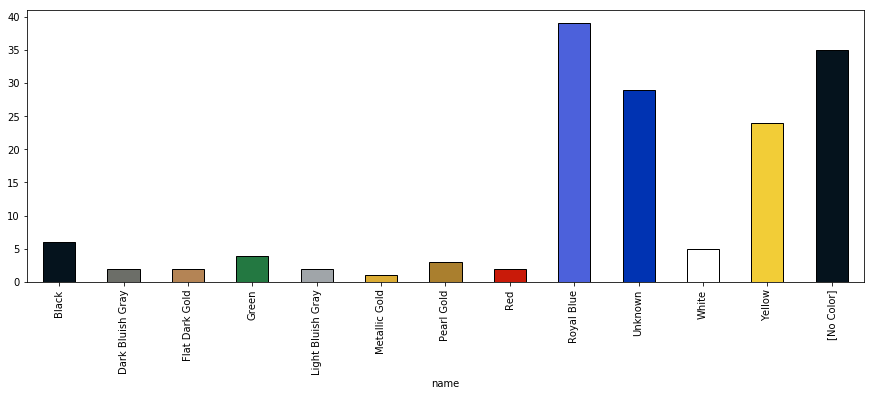

In [30]:
# inventory_id values in inventory_set
inventory_sets_inventory_id = set(inventory_sets.inventory_id.values)

# groupby with agg allow to groupby a column using the operation provided (Function to use for aggregating the data)
# to_frame : convert serie to dataFrame
inventory_part_color = inventory_parts.groupby('inventory_id').color_id.agg(most_common).to_frame().reset_index()

inventory_set_color = inventory_sets.groupby('set_id').inventory_id.agg(most_common).to_frame().reset_index()


# Match color_id with set_id
color_set = inventory_part_color[['inventory_id','color_id']].\
            merge(inventory_set_color[['inventory_id','set_id']])#, left_on='inventory_id', right_on='inventory_id')

color_set = color_set.merge(colors,how='left', left_on='color_id', right_on='id')



dominant_color_set = color_set.groupby('name').agg({'set_id': 'count', 'rgb': 'max'})

color_bar = dominant_color_set.plot.bar(rot=90, legend=False,
                                        color=[['#' + rgb for rgb in dominant_color_set['rgb'].values]],
                                        edgecolor = 'black',
                                       figsize=fig_size);
color_bar.set_ylabel = ('Set number');
color_bar.set_xlabel = ('Colors');

__Question A3.4 : Create a scatter plot of the *luminance*\* of the sets vs their publishing year.__



In [31]:
# Compute luminance
def rgb_Luminance(rgb):
    # Converting HEX to RGB (find on stackoverflow)
    rgb = tuple(float(int(rgb[i:i+2], 16))/255 for i in (0, 2 ,4));
    
    # Then return luminance
    return np.sqrt(0.299*rgb[0]*rgb[0] + 0.587*rgb[1]*rgb[1] + 0.114*rgb[2]*rgb[2]);

In [ ]:
# Match inventory_id with color_id and set_id
inventory = inventory_parts[['inventory_id', 'color_id']].\
            merge(inventory_sets[['inventory_id', 'set_id']], 
                  left_on='inventory_id', right_on='inventory_id', how='outer')


# Complement every set_id with the corresponding year
inventory = inventory.merge(sets[['id', 'year']], 
                            left_on='set_id', right_on='id', how='outer')


# Complement every color_id with the corresponding rgb value
inventory = inventory.merge(colors[['id', 'rgb']], 
                            left_on='color_id', right_on='id', how='outer')
# Remove missing values
inventory = inventory.dropna()

# Compute luminance for every part in the inventor
inventory['luminance'] = inventory['rgb'].apply(lambda x : rgb_Luminance(x))


inventory['year'] = inventory['year'].astype(str).astype(int)
# Plot the scatter diagram
plot_luminance = inventory.plot.scatter(x='year',y='luminance', color=colors_graph[1], figsize=fig_size)
#plt.show

#inventory['year']

__What do you observe for the years 1980-1981?__

We can see that for the years 1980-1981, there is a huge number of different values for the lumincance.
It contrast a lot form the others data we have!

__How do you interpret what you see?__

The data we have for this particular years appear like an outlier in our visualization. Something's clearly not right.

To understand a bit more what is going on, let's visualize some more info abour our data:

Numbers of sets per year:

In [ ]:
min_year = inventory['year'].min()
max_year = inventory['year'].max()
inventory['year'].value_counts(bins=range(min_year,max_year)).sort_index().plot(kind="bar",figsize=fig_size)

Visualizing the numbers of inventories per year that are stored in our data set, we see that we simply have a lot more data on these particular years than any other around it!

This tells us that it would be wrong to simply conclude that people were fans of very bright colours during this short period of time... Actually, we simply have more data, and thus potentially more parts with bright colors.

The work that could be worth doing would be to understand why we have so much data for these years and so little around them. Unfortunately, data alone are not relevant for such an interpretation, for example, one should investigate on how the data were collected to understand this gap.

We could make a wild guess and imagine that a lot of data from the years 1980-1981 actually correspond to previous years, but that they were added to the database incorrectly.

___
## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [ ]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

To load the json data we use the function read_json implemented by pandas which will store it directly in a dataframe.Write your code here

In [ ]:
data_bikes = pd.read_json(BIKES_DATA_FOLDER+'/metro-bike-share-trip-data.json.zip' )
print(data_bikes.shape)
data_bikes.head()

Now we have the DataFrame containing 132427 samples of 14 columns parameters. 

### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? ==> initial one


We would like to describe the type and the range value for each attribute.
To list the type of each attribute the dtypes function will perfectly fit the need.
We'll then do a description of the dataset to see the range, and some usfull information.

In [ ]:
# Print the size of the DataFrame
print("Shape data : "+str(data_bikes.shape))
# Print the type of each attribute
print(data_bikes.dtypes)

In [ ]:
# Print the description of the dataset
print(data_bikes.describe())

We can now analyze and have a better view of the data.



<b>Bike ID</b> : numpy.float64
min : 1349.0
max : 6728.0
 => Represent an ID (which could have been integer because these are real numbers)

<b>Duration</b> : numpy.int64
min : 60
max : 86400
 => Represent the duration of the trip, End time - Start Time, and the unit is the second
 
<b>End Time</b> : 'str' (Should apply a transformation into datetime)
min : 2016-07-07T04:20:00
max : 2017-04-02T10:32:00
=> Date type YYYY-MM-DDTHH:MM:SS

<b>Ending Station ID</b> : numpy.float64'
min : 3000.0
max : 4108.0
=> Represent an ID 

<b>Ending Station Latitude</b> : numpy.float64
min : 0.0
max : 34.0642815

<b>Ending Station Longitude</b> : numpy.float64
min : -118.472832
max : 0.0

<b>Passholder Type</b> : 'str' (Should apply a transformation into Category)
min : Flex Pass
max : Walk-up
=> 4 categories data : [Monthly Pass, Flex Pass, Walk-up, Staff Annual]  / Related to Plan Duration

<b>Plan Duration</b> : 'numpy.float64'
min : 0.0
max : 365.0
=> Represents the number of days related to the Passholder Type [30, 365, 0, nan]

<b>Start Time</b> : 'str' (Should apply a transformation into datetime)
min : 2016-07-07T04:17:00
max : 2017-03-31T23:45:00
=> Date type YYYY-MM-DDTHH:MM:SS

<b>Starting Station ID</b> : numpy.float64
min : 3000.0
max : 4108.0
=> Represent an ID 

<b>Starting Station Latitude</b> : numpy.float64
min : 0.0
max : 34.0642815

<b>Starting Station Longitude</b> : numpy.float64
min : -118.472832
max : 0.0

<b>Trip ID</b> : numpy.int64
min : 1912818
max : 23794218

<b>Trip Route Category</b> : 'str' (Should apply a transformation into Category)
min : One Way
max : Round Trip
=> 2 categories data [One Way, Round Trip] / Related to Ending/Starting Station ID

<h3> Categories </h3>
Indicate and transform the attributes that are `Categorical`. 

Trip Route Category and Passholder Type should be categorical, because they are strings limited to a few values and are describing obviously a category.

Let's analyze the form and the content values of these atttributes.

In [ ]:
data_bikes['Trip Route Category'].unique()
#Check the possible values for 'Trip Route Category' and its type.

In [ ]:
data_bikes['Passholder Type'].unique()
#Check the possible values for 'Passholder Type' and its type.

Currently the 2 attributes are related to an array of string.
In the next operations we'll transform these columns into categorical ones.

We'll start by turning the __[Trip Route Category]__ into a categorical one.

In [ ]:
#Analyze the attribute, display the differents possible values and finally print 
#the number of categories in this attribute. This is an informative line
print("Categorical analysis of [Trip Route Category]: \n"+ str(pd.Categorical(data_bikes['Trip Route Category'])))

#We will now replace inplace the attribute Trip Route Category to a Category attribute instead of strings.
data_bikes['Trip Route Category'] = data_bikes['Trip Route Category'].astype('category')

# Print the description of the Trip Route Category attribute to see that it is now a Categorical column.
print("\nDescription of [Trip Route Category] \n" + str(data_bikes['Trip Route Category'].describe()))

data_bikes['Trip Route Category'].unique()
#Check the possible values for 'Trip Route Category' and its type.

We can see that the [Trip Route Category] is now referenced as Categories instead of an array of string.

We'll then do the same procedure for __[Passholder Type]__

In [ ]:
print("Categorical analysis of [Passholder Type]: \n"+ str(pd.Categorical(data_bikes['Passholder Type'])))
data_bikes['Passholder Type'] = data_bikes['Passholder Type'].astype('category')
print("\nDescription of [Passholder Type]  \n" + str(data_bikes['Passholder Type'].describe()))

data_bikes['Passholder Type'].unique()

<h3> Redundancy </h3>
We can see that the Plan Duration category is redundent because it is completely linked with the Passeholder Type category. Additionally, we can delete the Trip Route Category because it is related to the check of Starting/Ending Station ID. If it is the same station => Round Trip, if not => One way. Finally the Duration is linked to the End time - Start time so we can get rid of it.

Redundent columns : 
- Passholder type = funct(Plan Duration) [Passholder Type]=[Plan Duration] :
    - [Monthly Pass] = [30]
    - [Flex Pass]= [365]
    - [Walk-up] = [0]
    - [Staff Annual] = [nan]
- Trip route category = funct(Starting Station ID, Ending station ID) :
    If the Starting Station ID is the same as the Ending Station ID then the 'Trip Route Category' is [Round Trip], otherwise it is [One Way]
    
- We can add the Duration = End time - Start time (converted in seconds). The duration column is redundent because we can compute it directly from the 2 attributes (End/Start time).

- We can even add the correlation between the Latitude/Longitude and Station ID, because a Station is obviously related to a position. But this is a higher level correlation since we can guess the relation but can't compute the value of  the Station ID  using only the latitude/longitude. 
    
What are the possible pitfalls of having such columns? 

Having such redundent columns will add some not necessarily space and increase the size of the database. Indeed with N (the number of samples) which could be big, adding a column can be expensive. Data redundancy can lead to anomalies, and corruption : Indeed if we want to add some additional samples, there could be some errors during the insertion. For example, if someone made a mistake and put a duration of 40sec instead of 400, it would not happen (less) if we calculate manually the data : End Time - Start Time. 

Reduce data redundancy by extracting such columns to separate DataFrames. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each Dataframe the type of each column and it's shape.

We will now reduce this data redudancy by dropping the found redundant columns.

In [ ]:
#data_bikes[(data_bikes['Passholder Type'] == 'Flex Pass') & (data_bikes['Plan Duration'] == 365)]
data_bikes[(data_bikes['Starting Station ID'] == data_bikes['Ending Station ID']) & (data_bikes['Trip Route Category'] != 'Round Trip') ]              


We can see above to prove the correlation between Round Trip and Starting/Ending station ID that when Ending ID == Starting the Trip Category = Round Trip otherwise it means that the value are composed by NaN values. We can do the same with the estimated other redundent columns.

In [ ]:
# We can easily drop the selected columns using the drop method to our DataFrame
new_data_bikes = data_bikes.drop(columns=["Trip Route Category", "Duration", "Plan Duration"])

# Print the type of each attributes
print(" ----- Old Data, Shape :" + str(data_bikes.shape))
print(data_bikes.dtypes)
    
print("\n\n ----- New Data, Shape :" + str(new_data_bikes.shape))
print(new_data_bikes.dtypes)

We can then see that the 3 columns are removed in the new one, and that we have effectively our Categorical attributes.

Below are printed some additional information about the memory usage difference between the 2 dataframes.

In [ ]:
print("Memory Usage of old DataFrame : " + str(sum(data_bikes.memory_usage())))
print("Memory Usage of new DataFrame : " + str(sum(new_data_bikes.memory_usage())))

### B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

__1)__ Plot the distribution of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).

For the querying phase, we will use the initial dataframe. Indeed the redundants columns are used for mainly all of these. Since they are already well implemented it is better to use them. 

To create this distribution we will have to count the number of trips assiociated with a station ID. The constraints is to set a plot with 20 bins so we can already divide the data into 20 intervals. We will then extract and store (to be more clear in the code) the data from the column 'Starting Station ID' within 20 intervals. 
Then we will be able to count the number of occurences of each interval in all the dataset. Finally we will plot using bar. Since the numbers are really important, the differences between some intervals can be huge, and then we're not able to see the amount of other interval. To counter this we'll set the y axis with a log scale.





In [ ]:
nb_outgoing = pd.cut(data_bikes['Starting Station ID'], bins=20, precision=0)
ax = nb_outgoing.value_counts().plot.bar(figsize=fig_size)
ax.grid(True)
ax.set_yscale('log')
ax.set_title("Number of outgoing trips per station")
plt.show()

__2)__ Plot histograms for the duration and trip starting hour in the day attributes. For both the duration and the trip starting hour use discrete 1-hour intervals. What do you observe in each plot? What are some popular values in the duration plot? Explain the local maxima and the trends you observe on the trip starting hour plot based on human behavior.

__Duration Histogram__

To creat the histogram of durations we have to extract it and transform it into hours unit from minuts (so we divide by 60). 
Then we simply have to plot the histogram of this extracted data. For the parameters we want 1h per interval so we'll creat a vector from 0 to 24 included (so to 25 with Python).

In [ ]:
# Extract Duration data, and transform it from seconds to hours
#durations = data_bikes['Duration']/3600

# Plot the histogram and put the bins parameter with a vector [0,1 ..., 24]
#durations.hist(bins=np.arange(24+1), alpha=0.7)
nb_durations = pd.cut(data_bikes['Duration']/3600, bins=np.arange(24+1), precision=0)
# Store the value of each bin and intervals

ax = nb_durations.value_counts().plot.bar(figsize=fig_size)
ax.grid(True)
ax.set_yscale('log')
ax.set_title("Number of outgoing trips per duration hours in the day")
plt.show()

#count, division = np.histogram(durations, bins=np.arange(24+1))
#print(count)
#print(division)

We can see in the print that we have indeed the values for the histogram with 1h per bins. 
[0->1], [1->2] etc..

Then we can clearly observe that the majority of the trips have a duration of less/equal than 1hour 59 min. The data is  very sparsed and for each incrementation of the hours interval there is less people using the bikes. Indeed with the human behaviour the bike will often be used for small travel in town and maybe not for a long trip. There is one particular value [23,24] which is important, explained by the fact that these are probably people giving the bike back after one day.

__Hour Time Histogram__

For this we want to extract from the 'Start Time' attribute the hour information. 
We then first have to transform the 'Start Time' and 'End Time' data from string to a datetime type.

In [ ]:
from datetime import datetime, date, time

# Execute it only once ///
# Transform the string date from 'Start Time' to a datetime type
data_bikes['Start Time'] = data_bikes['Start Time'].apply(lambda d: datetime.strptime(d, '%Y-%m-%yT%H:%M:%S'))

# Transform the string date from 'End Time' to a datetime type
data_bikes['End Time'] = data_bikes['End Time'].apply(lambda d: datetime.strptime(d, '%Y-%m-%yT%H:%M:%S'))


Since we have the datetime type we are able to extract the hour information for these attributes using dt.hour.
We well then extract the data and and apply the function to plot the histogram using the same approach to set the bins equivalent to 1 hour each. 

In [ ]:
# Store and print the informations about the histograms to check the
# value for each bin
hist_starttime, division_starttime = np.histogram((data_bikes['Start Time'].dt.hour), bins=np.arange(24+1))
print(hist_starttime)
print(division_starttime)

nb_hours = pd.cut(data_bikes['Start Time'].dt.hour, bins=np.arange(24+1), precision=0)
# Store the value of each bin and intervals

ax = nb_hours.value_counts().plot.bar(figsize=fig_size)
ax.grid(True)
ax.set_yscale('log')
ax.set_title("Number of outgoing trips per starting hour in the day")
plt.show()

In this histogram  we can see that there is a lot of trip between 11am to 6pm. This is based on the human behaviour so we obsviously have a lot of trips during the normal day, then a very few during the night and early in the morning. 

__3)__ For each trip route category, calculate the proportion of trips by passholder type and present your results in a stacked bar chart with normalized height.

We now want to count the number of trips by passholder type for each trip route category (One way, Round trip).
So we'll create a crosstab to merge ["Trip Route Category"] and ["Passholder Type"]. It will then give the number of occurences for each combination. But we want a normalized height so we'll add a parameter in the 'crosstab' method. This normalization should not be on all the dataframe, we only want to normalize each index (One Way and Round Trip) to see the percentages of trips. Finally we'll plot the extracted data.

In [ ]:
#Create and store the normalized crosstab with attributes "Trip Route Category" and "Passholder Type".
cross_route_passolder = pd.crosstab(data_bikes["Trip Route Category"], data_bikes["Passholder Type"], normalize='index')

#Print the dataframe to havea view of the data, and watch the percentages and normalization.
print(cross_route_passolder)

# Plot the stacked bar using the stored data extracted
cross_route_passolder.plot(kind='bar', stacked=True, figsize=fig_size)

We can observe on the printed data, that we have accurately the right normalization on each row (Passholder Type).
Furthermore the stacked plot show this extracted data with success. 
We can then observe that there is mostly 'Monthly Pass' for the 'One Way' Route Category, and mostly 'Walk-up' for the 'Round Trip' category. We can think that for the 'One Way' route category, these are people using frequently the bike to go to work or others. Then for the Walk-up it can be more impulsive like, go to buy some stuff/food and then come back quickly so that can explain the Round Trip section.

__4)__ Considering only trips that begin in the morning hours (before noon), plot in a single bar chart the proportion of trips by passholder type and trip route category. Explain any outliers you observe.

For this query we only want the data with a 'Start Time' with a value less than 12 (noon). 
We first have to do a condition and store the new extracted data to be more clear.

We then want to observe again the proportion for Route Category and Passholder Type so we have to create a new crosstab to have the number of occurences for each attributes. This time we do not want the data to be normalized. Finally print using the 'bar' parameter.

In [ ]:
#Filter and store the data_bikes to only get the trips starting before noon
data_bikes_filtered_morning = data_bikes[data_bikes['Start Time'].dt.hour < 12]

# Creation of the cross tab to get the number of occurences with "Passholder Type" & "Trip Route Category"
cross_tab_triproute_pass_filtered = pd.crosstab(data_bikes_filtered_morning["Passholder Type"], data_bikes_filtered_morning["Trip Route Category"])

#Print to have a quick view on the data and its value
print(cross_tab_triproute_pass_filtered)

# Plot the extracted and counted data
cross_tab_triproute_pass_filtered.plot(kind='bar', figsize=fig_size)


The plotted and printed data is showing some information. There is much more 'One Way' trips than 'Round Trip'. We can explain this, as people usually want to use bike to go to another place and to be faster than by walk. Additionally, this bar is showing data from the morning part, so these trips could be the way to go to work.
We can also observe that there is nearly no Staff Annual Passholder Type. Indeed these are exceptionnals Passholder type. The monthly pass is in contrary the most used Passholder, but is weirdly not the most used for the 'Round Trip' category.  It is the same for the FlexPass, and this can be explain by the fact, that if someone wants a specific Membership (Passholder) it probably means that they want to use it for some regular travels, to go in some specific place (work, home) and not for some quick travel (round trip).

__5) Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by passholder type and trip route category. Present your results in a DataFrame which has a unique, non-composite index.__


To split the data into 2 parts with the same number of bikes leaving the stations we have to find the index using the histograms data. So we will use the histogram made in the __2) Hour Time Histogram__ part. To find the index we will add the value of each bin in the histogram (counting the number of trips per hour) and divide by the total number of trips to finally print the percentage. We will then choose the best index.



In [ ]:
#search for indice to split in 2 parts
batchsum = 0
for i in range(len(hist_starttime)):
    #Add the value of each bin's value
    batchsum = batchsum + hist_starttime[i]
    #Print the index and the computed percentage of trips
    print(str(i) + "  :   " + str(batchsum/np.sum(hist_starttime)))
    

#The best Index is 15. We calculate the ratio to see that in each part there is approximately 50% of the trips.
print("\nIndex 15 :")
print("1st interval : "+str(np.sum(hist_starttime[:15])/np.sum(hist_starttime)))
print("2nd interval : "+str(np.sum(hist_starttime[15:])/np.sum(hist_starttime)))

We can see on this printed computations that the best index to split the dataset in 2 "equal" parts is the __index 15__.


Now for each of the two intervals we want to calculate the proportion of trips by passholder type and trip route category. First of all we have to extract in 2 DataFrame the filtered data : First part has the hour of 'Start Time' which is less than 15, and the second part is greater than 15. 

Then to compute the proportion we create 2 crosstab merging the 2 attributes "Trip Route Category" and "Passholder Type". Finally we want to merge these 2 DataFrame into a single one, with a unique index. There is multiple solutions to create a unique index, but to have a clear one we created a vector of 4 elements, describing 'One Way1', 'Round Trip1' for the Interval 1 and 'One Way2', 'Round Trip2' for the Interval 2. 

In [ ]:
# Filter and store the data to extract only with hour < 15
starttime_1 = data_bikes[data_bikes['Start Time'].dt.hour < 15]
# Filter and store the data to extract only with hour >= 15
starttime_2 = data_bikes[data_bikes['Start Time'].dt.hour >= 15]

# Create crosstab to get the proportion (Trip Route Cat. and Passholder Type) for the 2 intervals
cross1 = pd.crosstab(starttime_1["Trip Route Category"], starttime_1["Passholder Type"])
cross2 = pd.crosstab(starttime_2["Trip Route Category"], starttime_2["Passholder Type"])

# Concatenate the 2 intervals into a single one
result_dataframe = pd.concat([cross1,cross2])

# Transform the index into a unique one
result_dataframe.index = ['One Way1', 'Round Trip1', 'One Way2', 'Round Trip2']
print(result_dataframe)

#Check that the index is unique
print(result_dataframe.index.is_unique)

# Plot the merged DataFrame
result_dataframe.plot(kind='bar', figsize=fig_size)

__Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.__

We can observe that the proportion is approximately the same whether it is in the 1st interval or in the 2nd interval. We can also tell that the company won't have any signiciant benefit by creating a new scheme where the users pay less in the first interval because the proportion are equal. 

